In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import colors

import h5py
from pathlib import Path
textwidth = 6.268
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 100

import FKMC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
config = dict(
              mcmc_routine='quantum_cython_mcmc',
              N_burn_in = 10**2,
              N_steps = 10**3,
              N_system = 128,
              mu = 0,
              beta = np.logspace(-4,3,40),
              U = np.logspace(-4,4,40),
              V = np.array([-0.01,-0.05,-0.1,-0.15,-0.2,-0.5]),
              alpha= 1.5,
              outer_loop = np.array(['V',], dtype=h5py.special_dtype(vlen=str)),
              inner_loop = np.array(['U','beta'], dtype=h5py.special_dtype(vlen=str)),
              quantum = True,
              output_history = False,
              output_correlator = True,
              output_state = False,
              energy_max = 8,
              energy_min = -8,
              N_energy_bins = 500,
            )

working_dir = Path('../data/phase_diagram_6')
FKMC.jobmanager.setup_mcmc(config, working_dir, overwrite = True)

INFO:FKMC.jobmanager:Working in: ../data/phase_diagram_6
INFO:FKMC.jobmanager:Sample results:
INFO:FKMC.jobmanager:flag_6: array(shape=(2,), dtype=int64)
INFO:FKMC.jobmanager:classical_energies_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:numbers_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:magnetisations_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:quantum_energies_moments: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:classical_energies_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:numbers_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:magnetisations_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:quantum_energies_moments_err: array(shape=(9,), dtype=float64)
INFO:FKMC.jobmanager:correlator: array(shape=(65,), dtype=float64)
INFO:FKMC.jobmanager:q_energy_histogram: array(shape=(500,), dtype=float64)
INFO:FKMC.jobmanager:IPR_histogram: array(shape=(500,), dtype=flo

In [14]:
import logging
logging.getLogger().setLevel(logging.INFO)
FKMC.jobmanager.gather_mcmc(working_dir, do_all = False)

INFO:FKMC.jobmanager:copied_in wasn't in config, initialising it
INFO:FKMC.jobmanager:Number of Jobs to copy in: 6
INFO:FKMC.jobmanager:Job IDs: [0 1 2 3 4 5]...
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_0.hdf5
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_1.hdf5
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_2.hdf5
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_3.hdf5
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_4.hdf5
INFO:FKMC.jobmanager:Couldn't open ../data/phase_diagram_6/jobs/job_5.hdf5
INFO:FKMC.jobmanager:missing : []
INFO:FKMC.jobmanager:Jobs attempted this time: 6
INFO:FKMC.jobmanager:Overall completion: 0 / (6, 1600)
INFO:FKMC.jobmanager:File size: 0.13Gb


[]

['IPR_histogram', 'classical_energies_moments', 'classical_energies_moments_err', 'correlator', 'flag_6', 'magnetisations_moments', 'magnetisations_moments_err', 'numbers_moments', 'numbers_moments_err', 'q_energy_bounds', 'q_energy_histogram', 'q_energy_histogram_bins', 'quantum_energies_moments', 'quantum_energies_moments_err', 'runtime']
(6, 40, 40, 9)


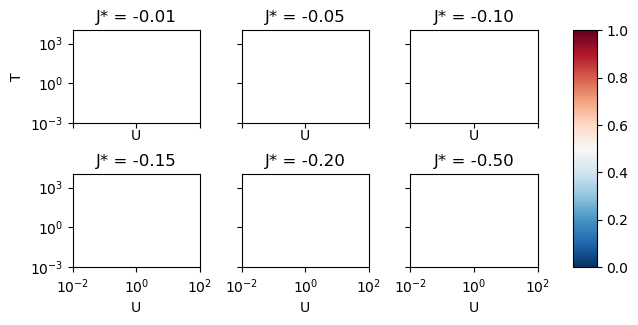

In [6]:
def phase_diagram_log(working_dir):
    result_filename = working_dir / 'results.hdf5'
    norm = colors.Normalize(vmin=0, vmax=1)

    with h5py.File(result_filename, 'r') as data:
        print(list(data.keys()))

        Vs = data.attrs['V']
        betas = data.attrs['beta']
        Us = data.attrs['U']

        M = np.array(data['magnetisations_moments'])
        #M[M == 0] = np.nan
        print(M.shape)

        N = len(Vs)
        f, axes = plt.subplots(2,N//2,
                              figsize = (textwidth, textwidth/2),
                               sharey = 'all',
                               sharex = 'all',
                               constrained_layout = True,
                              )
        axes = axes.flatten()

        for i,V,ax in zip(range(N),Vs,axes):
            cs = ax.pcolormesh(Us, 1/betas, M[i, :, :, 0], cmap='RdBu_r', norm = norm)
            ax.set(
                title = f'J* = {V:.2f}',
                #xlim = [0,5],
                #ylim = [0,1],
                xlabel = 'U',
                yscale = 'log',
                xscale = 'log',
            )


        f.colorbar(cs, ax=axes, orientation='vertical')
        axes[0].set(ylabel = 'T')
        f.savefig(f'{working_dir.stem}_log.pdf')

phase_diagram_log(Path('../data/phase_diagram_6'))